# Quick Start

## Project Instructions### Course Citation

The concepts and methodologies discussed in this notebook are inspired by the course [**Introduction to Portfolio Analysis in Python**](https://app.datacamp.com/learn/courses/introduction-to-portfolio-analysis-in-python) by [DataCamp](https://www.datacamp.com/), which provides an excellent introduction to portfolio analysis using Python. The course was designed and taught by:
Dr. Charlotte Werger]uctor

The course covers a range of portfolio optimization techniques, including mean-variance optimization, and provides a solid foundation in portfolio analysis using Python.
sis:

1. **Expected Returns and Annualized Sharpe Ratio**:
   - Calculate the expected returns and the annualized Sharpe ratio of an equally-weighted portfolio.
   - Assume the risk-free rate is 0%.
   - Store your answers as float variables called `benchmark_exp_return` and `benchmark_sharpe_ratio`.

2. **Minimize Volatility**:
   - Find a portfolio that minimizes volatility using mean-variance optimization.
   - Store the volatility of the portfolio as a float variable called `mv_portfolio_vol`.
   - Store the portfolio weights as a pandas Series called `mv_portfolio`.
   - Use the tickers as index.

3. **Maximize Sharpe Ratio**:
   - Find a portfolio that maximizes the Sharpe ratio using mean-variance optimization.
   - Keep the risk-free rate at 0%.
   - Store the Sharpe ratio (annualized) of the portfolio as a float variable called `ms_portfolio_sharpe`.
   - Store the portfolio weights as a pandas Series called `ms_portfolio`.
   - Use one! The code is correct.


In [1]:

# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

# Setting the plotting style to an available style
# Define the tickers
tickers = ["AAPL", "AMZN", "GOOGL", "META", "NFLX"]

# Download the stock prices
stock_prices_df = yf.download(tickers, start="2020-01-02", end="2024-11-17")['Adj Close']

# Display the first few rows of the dataframe
print(stock_prices_df.head())


[*********************100%***********************]  5 of 5 completed

Ticker                          AAPL       AMZN      GOOGL        META  \
Date                                                                     
2020-01-02 00:00:00+00:00  72.796005  94.900497  68.264961  209.150269   
2020-01-03 00:00:00+00:00  72.088287  93.748497  67.907845  208.043610   
2020-01-06 00:00:00+00:00  72.662720  95.143997  69.717865  211.961807   
2020-01-07 00:00:00+00:00  72.320984  95.343002  69.583206  212.420410   
2020-01-08 00:00:00+00:00  73.484352  94.598503  70.078476  214.573944   

Ticker                           NFLX  
Date                                   
2020-01-02 00:00:00+00:00  329.809998  
2020-01-03 00:00:00+00:00  325.899994  
2020-01-06 00:00:00+00:00  335.829987  
2020-01-07 00:00:00+00:00  330.750000  
2020-01-08 00:00:00+00:00  339.260010  


## Stock Price Plot

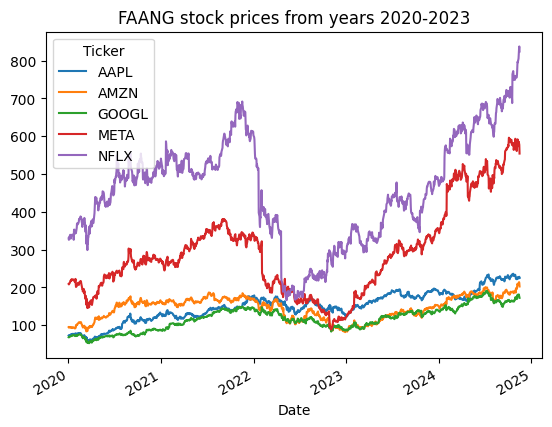

In [2]:
# Plotting the stock prices
stock_prices_df.plot(title="FAANG stock prices from years 2020-2023");

# Computing Simple Returns
The formula for calculating simple returns (also known as arithmetic returns) is:

$$ R_t = \frac{P_t - P_{t-1}}{P_{t-1}} $$

Where:
- \( R_t \) is the return at time \( t \).
- \( P_t \) is the price at time \( t \).
- \( P_{t-1} \) is the price at time \( t-1 \).

In Python, you can calculate simple returns using the `pct_change()` method from pandas, which computes the percentage change between the current and priorge().dropna()


In [3]:
returns_df = stock_prices_df.pct_change().dropna()
print(returns_df)


Ticker                         AAPL      AMZN     GOOGL      META      NFLX
Date                                                                       
2020-01-03 00:00:00+00:00 -0.009722 -0.012139 -0.005231 -0.005291 -0.011855
2020-01-06 00:00:00+00:00  0.007968  0.014886  0.026654  0.018834  0.030469
2020-01-07 00:00:00+00:00 -0.004703  0.002092 -0.001931  0.002164 -0.015127
2020-01-08 00:00:00+00:00  0.016086 -0.007809  0.007118  0.010138  0.025729
2020-01-09 00:00:00+00:00  0.021241  0.004799  0.010498  0.014311 -0.010611
...                             ...       ...       ...       ...       ...
2024-11-11 00:00:00+00:00 -0.012029 -0.006437  0.011214 -0.010469  0.013081
2024-11-12 00:00:00+00:00  0.000000  0.010008  0.007042  0.002829  0.017456
2024-11-13 00:00:00+00:00  0.003969  0.024843 -0.015086 -0.008242  0.013386
2024-11-14 00:00:00+00:00  0.013770 -0.012237 -0.018448 -0.004897  0.008176
2024-11-15 00:00:00+00:00 -0.014109 -0.041942 -0.017599 -0.039989 -0.015885

[1227 rows 

### Equally Weighted Portfolio

An equally weighted portfolio assigns the same weight to each asset in the portfolio. If you have \( n \) assets, the weight for each asset \( w_i \) is given by:

$$ w_i = \frac{1}{n} $$

The portfolio return \( R_p \) is the weighted sum of the individual asset returns \( R_i \):

$$ R_p = \sum_{i=1}^{n} w_i R_i $$

The expected portfolio return is the average of the portfolio returns over a period of time.

The Sharpe ratio is calculated as:

$$ \text{Sharpe Ratio} = \frac{\text{Expected Portfolio Return} - \text{Risk-Free Rate}}{\text{Portfolio Standard Deviation}} $$


In [4]:
##Daily simple return
# Calculate the number of assets
num_assets = len(stock_prices_df.columns)

# Calculate the 1/n portfolio weights
portfolio_weights = [1 / num_assets] * num_assets

# Calculate daily returns
returns_df = stock_prices_df.pct_change().dropna()

# Calculate the portfolio returns of the 1/n portfolio
portfolio_returns = returns_df.dot(portfolio_weights)

# Calculate the expected portfolio return (daily)
benchmark_exp_return_daily = portfolio_returns.mean()

print(benchmark_exp_return_daily)


0.001070084261298174


### Annualizing Daily Return and Volatility

The formula for annualizing daily return is:

$$ R_{\text{annual}} = R_{\text{daily}} \times 252 $$

Where:
- \( R_{\text{annual}} \) is the annualized return.
- \( R_{\text{daily}} \) is the daily return.
- 252 is the number of trading days in a year.

The formula for annualizing daily volatility is:

$$ \sigma_{\text{annual}} = \sigma_{\text{daily}} \times \sqrt{252} $$

Where:
- \( \sigma_{\text{annual}} \) is the annualized volatility.
- \( \sigma_{\text{daily}} \) is the daily volatility.
- \( \sqrt{252} \) is the square root of the number of trading days in a year.

### Sharpe Ratio

The formula for the Sharpe ratio is:

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$

Where:
- \( R_p \) is the expected portfolio return.
- \( R_f \) is the risk-free rate.
- \( \sigma_p \) is the portfolio standard deviation (volatility).
g days in a year.


In [5]:
# Assuming Rf is zero
# Calculate the expected portfolio return (annualized)
benchmark_exp_return_annualized = benchmark_exp_return_daily * 252

# Calculate the portfolio's Sharpe ratio (daily)
benchmark_sharpe_ratio_daily = portfolio_returns.mean() / portfolio_returns.std()

# Calculate the portfolio's Sharpe ratio (annualized)
benchmark_sharpe_ratio_annualized = benchmark_exp_return_annualized / (portfolio_returns.std() * np.sqrt(252))

# Calculate the portfolio's volatility (annualized)
portfolio_volatility_annualized = portfolio_returns.std() * np.sqrt(252)

# Create a DataFrame for easy display
results = pd.DataFrame({
    "Metric": [
        "Expected Portfolio Return (Daily)",
        "Expected Portfolio Return (Annualized)",
        "Annualized Sharpe Ratio",
        "Annualized Volatility"
    ],
    "Value": [
        benchmark_exp_return_daily,
        benchmark_exp_return_annualized,
        benchmark_sharpe_ratio_annualized,
        portfolio_volatility_annualized
    ]
})

# Display the table in Jupyter Notebook
results


,Metric,Value
0,Expected Portfolio Return (Daily),0.001070
1,Expected Portfolio Return (Annualized),0.269661
2,Annualized Sharpe Ratio,0.873194
3,Annualized Volatility,0.308822


### Task 2: Minimize Volatility

To find a portfolio that minimizes volatility using mean-variance optimization, we follow these steps:

1. **Calculate the Annualized Expected Returns**:
   - The annualized expected returns are calculated by multiplying the mean of the daily returns by 252 (the number of trading days in a year):
     $$ \mu = \mathbb{E}[R_{\text{daily}}] \times 252 $$

2. **Calculate the Annualized Covariance Matrix**:
   - The covariance matrix of the returns is also annualized by multiplying the daily covariance matrix by 252:
     $$ \Sigma = \text{Cov}(R_{\text{daily}}) \times 252 $$

3. **Mean-Variance Optimization**:
   - We use mean-variance optimization to find the portfolio weights \( w \) that minimize the portfolio's volatility. This involves solving the following optimization problem:
     $$ \min_w \sqrt{w^T \Sigma w} $$
   - Subject to the constraint that the sum of the weights equals 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

4. **Store the Portfolio Weights**:
   - The optimized portfolio weights are stored in a pandas Series called `mv_portfolio`.

5. **Calculate the Minimized Volatility**:
   - The minimized volatility of the portfolio is given by:
     $$ \sigma_{\text{min}} = \sqrt{w^T \Sigma w} $$
   - This value is stored as a float variable called `mv_portfolio_vol`.

### Detailed Matrix Formula

To minimize the portfolio's volatility, we solve the following optimization problem:

1. **Objective Function**:
   - Minimize the portfolio's variance:
     $$ \min_w w^T \Sigma w $$

2. **Constraints**:
   - The sum of the weights must equal 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

3. **Lagrangian Function**:
   - To solve this constrained optimization problem, we use the Lagrangian function:
     $$ \mathcal{L}(w, \lambda) = w^T \Sigma w + \lambda (1 - \sum_{i=1}^{n} w_i) $$

4. **First-Order Conditions**:
   - Taking the derivative of the Lagrangian function with respect to \( w \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial w} = 2 \Sigma w - \lambda \mathbf{1} = 0 $$
   - Taking the derivative of the Lagrangian function with respect to \( \lambda \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \sum_{i=1}^{n} w_i = 0 $$

5. **Solving for Weights**:
   - Solving the system of equations, we get the optimal weights \( w \):
     $$ w = \frac{\Sigma^{-1} \mathbf{1}}{\mathbf{1}^T \Sigma^{-1} \mathbf{1}} $$

By following these steps, we can construct a portfolio that minimizes volatility, providing a more stable investment option.


In [6]:
# Calculate the annualized expected returns and the covariance matrix
avg_returns = returns_df.mean() * 252
cov_mat = returns_df.cov() * 252

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)

# Find the weights that minimize volatility
weights = ef.min_volatility()
mv_portfolio = pd.Series(weights, index=stock_prices_df.columns)

# Find the minimized volatility
mv_portfolio_vol = ef.portfolio_performance(risk_free_rate=0)[1]

# Create a DataFrame to display the portfolio weights and minimized volatility
mv_results = pd.DataFrame({
    "Metric": [
        "Minimized Volatility"
    ],
    "Value": [
        f"{mv_portfolio_vol:.4f}"  # Display volatility with four decimals
    ]
})

# Display the portfolio weights separately in a clean format
print("Minimized Volatility Portfolio Weights:")
print(mv_portfolio)

# Display the minimized volatility in a clean format
print(f"\nMinimized Volatility: {mv_portfolio_vol:.4f}")

# If you want to return the results in a more readable format in Jupyter, use the following line:
mv_results


Minimized Volatility Portfolio Weights:
Ticker
AAPL     0.415183
AMZN     0.150616
GOOGL    0.353269
META     0.000000
NFLX     0.080932
dtype: float64

Minimized Volatility: 0.2868


,Metric,Value
0,Minimized Volatility,0.2868


### Task 3: Maximize Sharpe Ratio

To find a portfolio that maximizes the Sharpe ratio using mean-variance optimization, we follow these steps:

1. **Calculate the Annualized Expected Returns**:
   - The annualized expected returns are calculated by multiplying the mean of the daily returns by 252 (the number of trading days in a year):
     $$ \mu = \mathbb{E}[R_{\text{daily}}] \times 252 $$

2. **Calculate the Annualized Covariance Matrix**:
   - The covariance matrix of the returns is also annualized by multiplying the daily covariance matrix by 252:
     $$ \Sigma = \text{Cov}(R_{\text{daily}}) \times 252 $$

3. **Mean-Variance Optimization**:
   - We use mean-variance optimization to find the portfolio weights \( w \) that maximize the Sharpe ratio. This involves solving the following optimization problem:
     $$ \max_w \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} $$
   - Subject to the constraint that the sum of the weights equals 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

4. **Store the Portfolio Weights**:
   - The optimized portfolio weights are stored in a pandas Series called `ms_portfolio`.

5. **Calculate the Annualized Sharpe Ratio**:
   - The annualized Sharpe ratio of the portfolio is given by:
     $$ \text{Sharpe Ratio}_{\text{annual}} = \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} \times \sqrt{252} $$
   - This value is stored as a float variable called `ms_portfolio_sharpe`.

### Detailed Matrix Formula

To maximize the portfolio's Sharpe ratio, we solve the following optimization problem:

1. **Objective Function**:
   - Maximize the Sharpe ratio:
     $$ \max_w \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} $$

2. **Constraints**:
   - The sum of the weights must equal 1:
     $$ \sum_{i=1}^{n} w_i = 1 $$

3. **Lagrangian Function**:
   - To solve this constrained optimization problem, we use the Lagrangian function:
     $$ \mathcal{L}(w, \lambda) = \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}} + \lambda (1 - \sum_{i=1}^{n} w_i) $$

4. **First-Order Conditions**:
   - Taking the derivative of the Lagrangian function with respect to \( w \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial w} = \frac{\mu - R_f}{\sqrt{w^T \Sigma w}} - \frac{w^T \mu - R_f}{2(w^T \Sigma w)^{3/2}} \Sigma w - \lambda \mathbf{1} = 0 $$
   - Taking the derivative of the Lagrangian function with respect to \( \lambda \) and setting it to zero:
     $$ \frac{\partial \mathcal{L}}{\partial \lambda} = 1 - \sum_{i=1}^{n} w_i = 0 $$

5. **Solving for Weights**:
   - Solving the system of equations, we get the optimal weights \( w \):
     $$ w = \frac{\Sigma^{-1} (\mu - R_f)}{\mathbf{1}^T \Sigma^{-1} (\mu - R_f)} $$

By following these steps, we can construct a portfolio that maximizes the Sharpe ratio, providing an optimal balance between return and risk.
atility, providing a more stable investment option.


In [13]:
# Alternative approach to get the expected returns and the covariance matrix
avg_returns = expected_returns.mean_historical_return(stock_prices_df, compounding=False)
cov_mat = risk_models.sample_cov(stock_prices_df)

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)

# Find the weights that maximize the Sharpe ratio
weights = ef.max_sharpe(risk_free_rate=0)
ms_portfolio = pd.Series(weights, index=stock_prices_df.columns)

# Find the maximized Sharpe ratio
ms_portfolio_sharpe = ef.portfolio_performance(risk_free_rate=0)[2]

# Create a DataFrame for the results
results = pd.DataFrame({
    "Ticker": stock_prices_df.columns,
    "Optimal Weight": ms_portfolio
})

# Print results
print("Maximized Sharpe Ratio Portfolio Weights:\n", results)
print("\nMaximized Sharpe Ratio: {:.4f}".format(ms_portfolio_sharpe))

Maximized Sharpe Ratio Portfolio Weights:
        Ticker  Optimal Weight
Ticker                       
AAPL     AAPL        0.586185
AMZN     AMZN        0.000000
GOOGL   GOOGL        0.183554
META     META        0.064763
NFLX     NFLX        0.165498

Maximized Sharpe Ratio: 0.9428


return.

## Capital Allocation Line (CAL)

The CAL is a straight line that starts from the risk-free rate and is tangent to the efficient frontier of risky assets. The slope of the CAL is the Sharpe ratio of the tangency portfolio. The equation of the CAL is given by:

$$
E(R_p) = R_f + \frac{E(R_t) - R_f}{\sigma_t} \sigma_p
$$

Where:
- \(E(R_p)\) is the expected return of the portfolio
- \(R_f\) is the risk-free rate
- \(E(R_t)\) is the expected return of the tangency portfolio
- \(\sigma_t\) is the standard deviation (volatility) of the tangency portfolio
- \(\sigma_p\) is the standard deviation (volatility) of the portfolio

## Tangency Portfolio

The tangency portfolio is the portfolio of risky assets that maximizes the Sharpe ratio. The Sharpe ratio is defined as:

$$
\text{Sharpe Ratio} = \frac{E(R_t) - R_f}{\sigma_t}
$$

To find the tangency portfolio, we solve the following optimization problem:

$$
\max_w \frac{w^T \mu - R_f}{\sqrt{w^T \Sigma w}}
$$

Subject to the constraint that the sum of the weights equals 1:

$$
\sum_{i=1}^n w_i = 1
$$

Where:
- \(w\) is the vector of portfolio weights
- \(\mu\) is the vector of expected returns of the assets
- \(\Sigma,
       x="Volatility (Standard Deviation)",
       y="Expected Return") +
  theme_minimal()


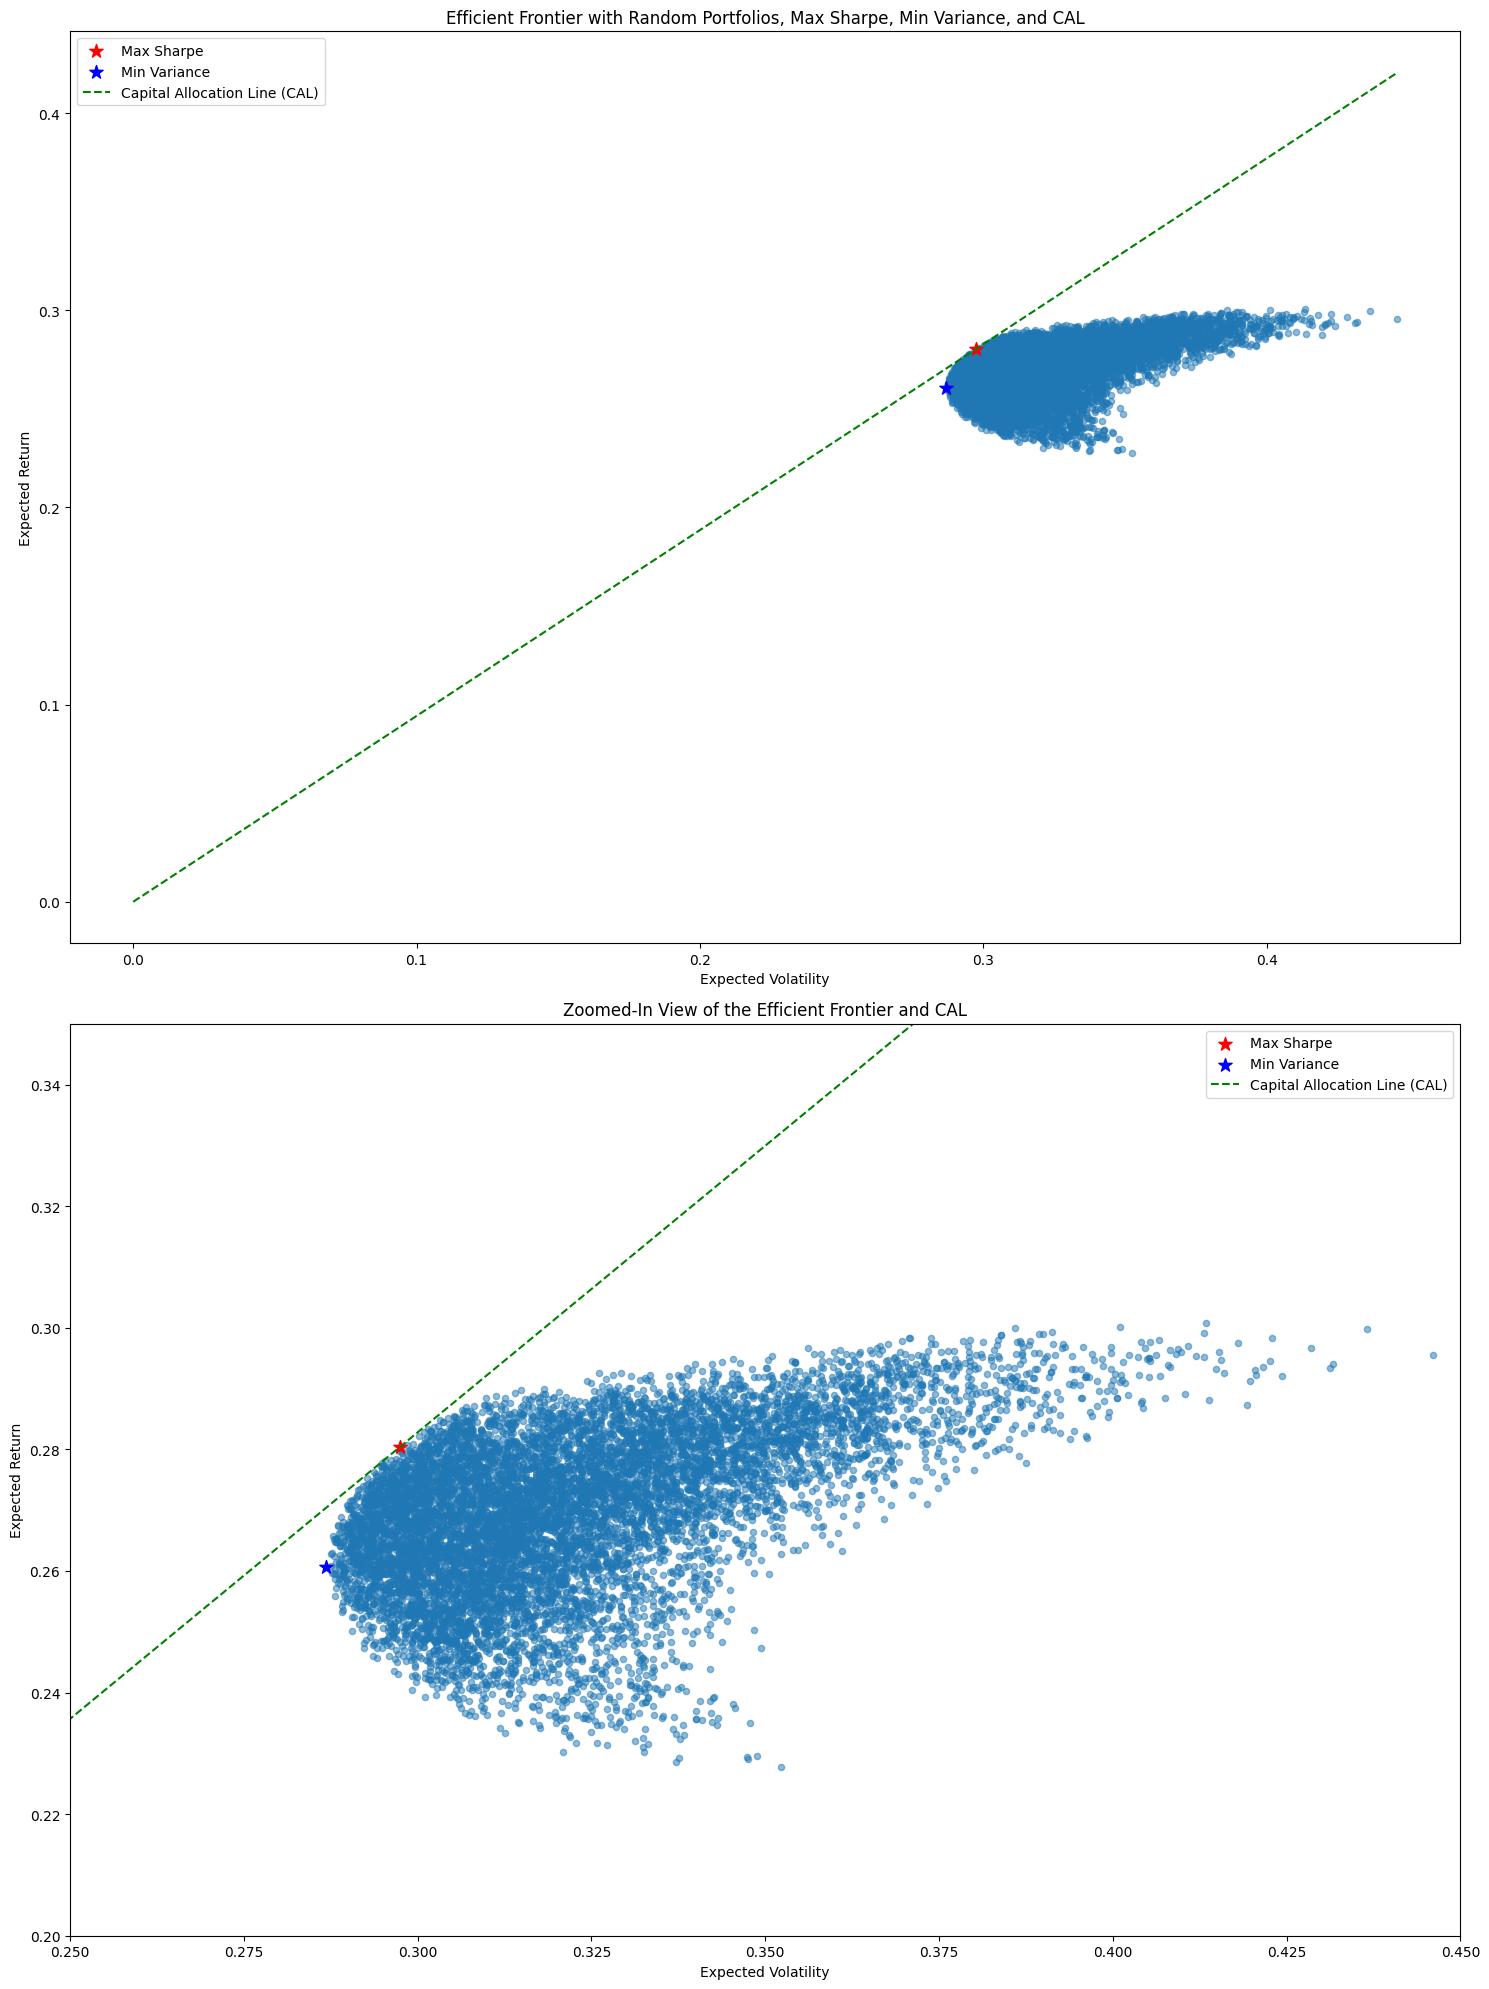

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pypfopt import EfficientFrontier, expected_returns, risk_models

# Example data: Replace stock_prices_df with your actual data
avg_returns = expected_returns.mean_historical_return(stock_prices_df, compounding=False)
cov_mat = risk_models.sample_cov(stock_prices_df)

# Instantiate the EfficientFrontier object with constraints
ef = EfficientFrontier(avg_returns, cov_mat, weight_bounds=(0, 1))

# Solve for the max Sharpe ratio portfolio
ef_max_sharpe = ef.deepcopy()
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()

# Solve for the minimum variance portfolio
ef_min_var = ef.deepcopy()
ef_min_var.min_volatility()
ret_min_var, std_min_var, _ = ef_min_var.portfolio_performance()

# Generate random portfolios
n_samples = 10000
weights = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
portfolio_returns = weights.dot(ef.expected_returns)
portfolio_volatilities = np.sqrt(np.diag(weights @ ef.cov_matrix @ weights.T))

# Create a DataFrame for the random portfolios
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility': portfolio_volatilities})

# Create subplots (2 plots stacked vertically)
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

# First plot: General efficient frontier with random portfolios
ax1 = axes[0]
portfolios.plot(x='Volatility', y='Return', kind='scatter', alpha=0.5, ax=ax1)  # Change to light blue
ax1.scatter(std_tangent, ret_tangent, marker="*", color='r', s=100, label="Max Sharpe")
ax1.scatter(std_min_var, ret_min_var, marker="*", color='b', s=100, label="Min Variance")

# Add the accurate CAL line (Risk-free rate is assumed to be 0%)
cal_volatility = np.linspace(0, max(portfolio_volatilities), 100)  # Range of volatility for CAL
cal_return = (ret_tangent / std_tangent) * cal_volatility  # CAL formula with slope based on Max Sharpe ratio
ax1.plot(cal_volatility, cal_return, label="Capital Allocation Line (CAL)", color="g", linestyle="--")

# Add labels and title for the first plot
ax1.set_xlabel('Expected Volatility')
ax1.set_ylabel('Expected Return')
ax1.set_title('Efficient Frontier with Random Portfolios, Max Sharpe, Min Variance, and CAL')
ax1.legend()

# Second plot: Zoomed-in version focused on the region where volatility > 0.2 and return > 0.2
ax2 = axes[1]
portfolios.plot(x='Volatility', y='Return', kind='scatter', alpha=0.5, ax=ax2)  # Change to light blue
ax2.scatter(std_tangent, ret_tangent, marker="*", color='r', s=100, label="Max Sharpe")
ax2.scatter(std_min_var, ret_min_var, marker="*", color='b', s=100, label="Min Variance")

# Plot the CAL line for the second plot
ax2.plot(cal_volatility, cal_return, label="Capital Allocation Line (CAL)", color="g", linestyle="--")

# Add labels and title for the second plot
ax2.set_xlabel('Expected Volatility')
ax2.set_ylabel('Expected Return')
ax2.set_title('Zoomed-In View of the Efficient Frontier and CAL')

# Adjust the second plot to start from 0.2 for both axes
ax2.set_xlim(0.25, 0.45)  # Focus on a smaller range of volatilities
ax2.set_ylim(0.2, 0.35)  # Focus on a smaller range of returns

# Add the legend to both plots
ax1.legend()
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Alternate Approach: Introduction to Expected Risk and Return Using Exponentially Weighted Returns

In this analysis, we will explore the concept of expected risk and return using exponentially weighted returns. Unlike the traditional approach of using historical mean returns, exponentially weighted returns give more importance to recent data points, making the analysis more responsive to recent market changes. This method is particularly useful in volatile markets where recent trends are more indicative of future performance.

### Exponentially Weighted Returns

Exponentially weighted returns are calculated by applying an exponential decay factor to historical returns. This means that more recent returns have a higher weight compared to older returns. The formula for calculating exponentially weighted returns is:

$$
R_t = \frac{\sum_{i=0}^{n-1} \lambda^i R_{t-i}}{\sum_{i=0}^{n-1} \lambda^i}
$$

Where:
- \( R_t \) is the exponentially weighted return at time \( t \)
- \( \lambda \) is the decay factor (0 < \( \lambda \) < 1)
- \( R_{t-i} \) is the return at time \( t-i \)
- \( n \) is the number of periods

### Calculating Expected Returns and Covariance Matrix

To calculate the expected returns and the covariance matrix using exponentially weighted returns, we follow these steps:

1. **Calculate Exponentially Weighted Returns**: Apply the exponential decay factor to the historical returns to get the exponentially weighted returns.
2. **Expected Returns**: Compute the mean of the exponentially weighted returns.
3. **Covariance Matrix**: Calculate the covariance matrix of the exponen 'AAPL': [150, 152, 153, 155, 157],
.


In [16]:
from pypfopt import expected_returns
# Exponentially weighted moving average
mu_ema = expected_returns.ema_historical_return(stock_prices_df, span = 252, frequency = 252)

print(mu_ema)

Ticker
AAPL     0.258208
AMZN     0.443631
GOOGL    0.262920
META     0.536132
NFLX     0.920928
Name: 2024-11-15 00:00:00+00:00, dtype: float64


## now for exponentially weighted Covar Matrix

In [18]:
from pypfopt import risk_models

sigma_ew = risk_models.exp_cov(stock_prices_df, span = 180, frequency = 252) #span does not need to be the same as the return
sigma_ew

Ticker,AAPL,AMZN,GOOGL,META,NFLX
Ticker,,,,,
AAPL,0.050123,0.022801,0.021547,0.025351,0.023479
AMZN,0.022801,0.090320,0.041908,0.052607,0.036501
GOOGL,0.021547,0.041908,0.066096,0.041387,0.026605
META,0.025351,0.052607,0.041387,0.104239,0.032431
NFLX,0.023479,0.036501,0.026605,0.032431,0.093046


In [20]:
from pypfopt import expected_returns, risk_models, EfficientFrontier

# Exponentially weighted moving average for expected returns
mu_ema = expected_returns.ema_historical_return(stock_prices_df, span=252, frequency=252)

# Exponentially weighted covariance matrix
sigma_ew = risk_models.exp_cov(stock_prices_df, span=180, frequency=252)  # Span does not need to be the same as return

# Instantiate the EfficientFrontier object with constraints
ef_alt = EfficientFrontier(mu_ema, sigma_ew, weight_bounds=(0, 1))

# Solve for the max Sharpe ratio portfolio
ef_max_sharpe_alt = ef_alt.deepcopy()
ef_max_sharpe_alt_weights = ef_max_sharpe_alt.max_sharpe()
ret_tangent_alt, std_tangent_alt, sharpe_tangent_alt = ef_max_sharpe_alt.portfolio_performance()

# Solve for the minimum variance portfolio
ef_min_var_alt = ef_alt.deepcopy()
ef_min_var_alt_weights = ef_min_var_alt.min_volatility()
ret_min_var_alt, std_min_var_alt, sharpe_min_var_alt = ef_min_var_alt.portfolio_performance()

# Print results
print("Max Sharpe Ratio Portfolio:")
print(f"Expected Return: {ret_tangent_alt:.2%}")
print(f"Volatility: {std_tangent_alt:.2%}")
print(f"Sharpe Ratio: {sharpe_tangent_alt:.2f}")
print("Weights:", ef_max_sharpe_alt_weights)

print("\nMinimum Variance Portfolio:")
print(f"Expected Return: {ret_min_var_alt:.2%}")
print(f"Volatility: {std_min_var_alt:.2%}")
print(f"Sharpe Ratio: {sharpe_min_var_alt:.2f}")
print("Weights:", ef_min_var_alt_weights)


Max Sharpe Ratio Portfolio:
Expected Return: 84.55%
Volatility: 27.27%
Sharpe Ratio: 3.03
Weights: OrderedDict({'AAPL': 0.0, 'AMZN': 0.0, 'GOOGL': 0.0, 'META': 0.1959367644253341, 'NFLX': 0.8040632355746661})

Minimum Variance Portfolio:
Expected Return: 38.31%
Volatility: 18.95%
Sharpe Ratio: 1.92
Weights: OrderedDict({'AAPL': 0.4829743549653943, 'AMZN': 0.0731804012795355, 'GOOGL': 0.2522858394443024, 'META': 0.0437958745599948, 'NFLX': 0.1477635297507731})


## Sortino Ratio and Semicovariance

The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns (downside deviation) instead of the total standard deviation of portfolio returns.

### Sortino Ratio

The Sortino ratio is calculated as follows:

$$
\text{Sortino Ratio} = \frac{R_p - r_f}{\sigma_d}
$$

Where:
- \( R_p \) is the actual or expected portfolio return
- \( r_f \) is the risk-free rate
- \( \sigma_d \) is the standard deviation of the downside (downside deviation)

### Formula Explanation

1. **Portfolio Return (\( R_p \))**: This is the actual or expected return of the portfolio.
2. **Risk-Free Rate (\( r_f \))**: This is the return of a risk-free asset, such as government bonds.
3. **Downside Deviation (\( \sigma_d \))**: This measures the variability of returns that fall below a minimum acceptable return (MAR), which is often set to the risk-free rate or zero.

### Target Risk (Semicovariance)

The target risk (semicovariance) is used to measure the downside risk of a portfolio. It is calculated as follows:

$$
\text{Target Risk} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (\text{return} - \text{target return})^2 f(t)}
$$

Where:
- \( n \) is the number of time periods
- \( \text{return} \) is the portfolio return at time \( t \)
- \( \text{target return} \) is the minimum acceptable return
- \( f(t) \) is a function that equals 1 if the return is less than the target return and 0 otherwise

### Optimization Using Sortino Ratio

To optimize a portfolio using the Sortino ratio, we aim to maximize the ratio. This involves finding the portfolio weights that maximize the expected return while minimizing the downside risk. The optimization problem can be formulated as:

$$
\max_w \frac{w^T \mu - r_f}{\sqrt{\frac{1}{n} \sum_{i=1}^{n} \min(0, R_{p,t} - \text{target return})^2}}
$$

Subject to the constraint that the sum of the weights equals 1:

$$
\sum_{i=1}^n w_i = 1
$$

Where:
- \( w \) is the vector of portfolio weights
- \( \o portfolio
print("Weights of the Max Sortino Ratio Portfolio:\n", weights_max_sortino)


In [24]:
sigma_semi = risk_models.semicovariance(stock_prices_df, becnhmark = 0 , frequency = 252)
sigma_semi

Ticker,AAPL,AMZN,GOOGL,META,NFLX
Ticker,,,,,
AAPL,0.046797,0.038174,0.037455,0.043792,0.039245
AMZN,0.038174,0.061258,0.041951,0.053587,0.050414
GOOGL,0.037455,0.041951,0.050668,0.050089,0.039749
META,0.043792,0.053587,0.050089,0.098824,0.060463
NFLX,0.039245,0.050414,0.039749,0.060463,0.105138


In [27]:
# Instantiate the EfficientFrontier object with constraints
ef_alt2 = EfficientFrontier(mu_ema, sigma_semi, weight_bounds=(0, 1))

# Solve for the max Sharpe ratio portfolio
ef_max_sharpe_alt2 = ef_alt2.deepcopy()
ef_max_sharpe_alt_weights2 = ef_max_sharpe_alt2.max_sharpe()
ret_tangent_alt2, std_tangent_alt2, sharpe_tangent_alt2 = ef_max_sharpe_alt2.portfolio_performance()

# Solve for the minimum variance portfolio
ef_min_var_alt2 = ef_alt2.deepcopy()
ef_min_var_alt_weights2 = ef_min_var_alt2.min_volatility()
ret_min_var_alt2, std_min_var_alt2, sharpe_min_var_alt2 = ef_min_var_alt2.portfolio_performance()

# Print results
print("Max Sharpe Ratio Portfolio:")
print(f"Expected Return: {ret_tangent_alt2:.2%}")
print(f"Volatility: {std_tangent_alt2:.2%}")
print(f"Sharpe Ratio: {sharpe_tangent_alt2:.2f}")
print("Weights:", ef_max_sharpe_alt_weights2)

print("\nMinimum Variance Portfolio:")
print(f"Expected Return: {ret_min_var_alt2:.2%}")
print(f"Volatility: {std_min_var_alt2:.2%}")
print(f"Sharpe Ratio: {sharpe_min_var_alt2:.2f}")
print("Weights:", ef_min_var_alt_weights2)


Max Sharpe Ratio Portfolio:
Expected Return: 92.09%
Volatility: 32.43%
Sharpe Ratio: 2.78
Weights: OrderedDict({'AAPL': -2.136043933e-07, 'AMZN': 6.3178e-08, 'GOOGL': -1.131914308e-07, 'META': 1.099329538e-07, 'NFLX': 1.0000001545131723})

Minimum Variance Portfolio:
Expected Return: 29.90%
Volatility: 20.61%
Sharpe Ratio: 1.35
Weights: OrderedDict({'AAPL': 0.5219507652356605, 'AMZN': 0.1170292963209209, 'GOOGL': 0.3345816790388505, 'META': 0.0, 'NFLX': 0.026438259404568})


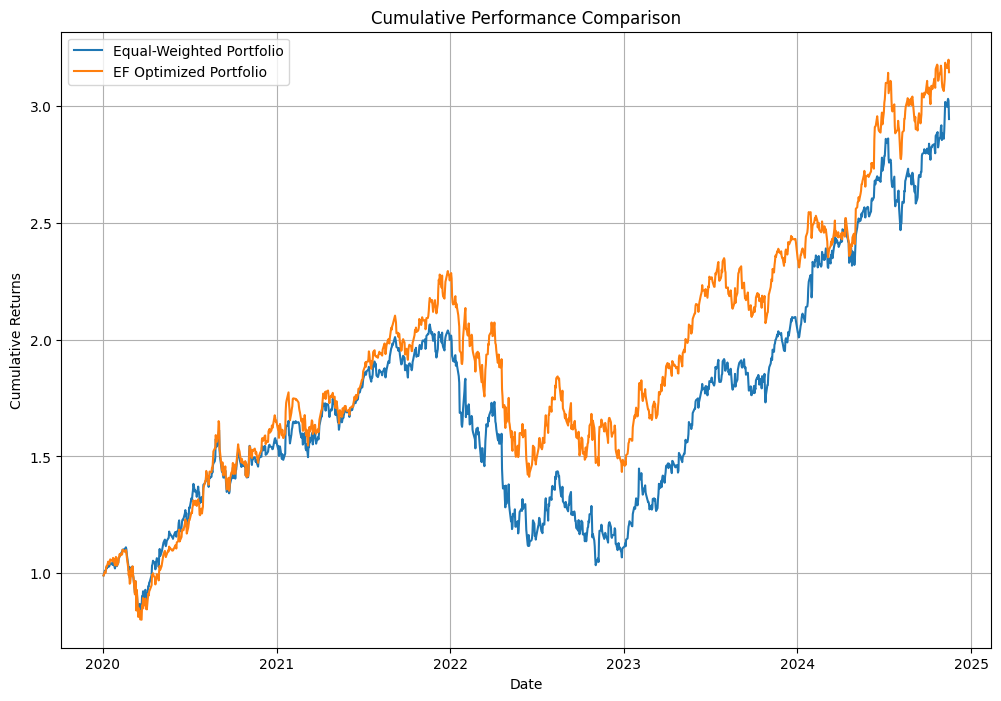

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate cumulative returns for the equal-weighted portfolio
equal_weights = np.ones(len(stock_prices_df.columns)) / len(stock_prices_df.columns)
equal_weighted_returns = returns_df.dot(equal_weights)
cumulative_equal_weighted = (1 + equal_weighted_returns).cumprod()

# Instantiate the EfficientFrontier object
ef = EfficientFrontier(avg_returns, cov_mat)
# Find the weights that maximize the Sharpe ratio
ef_weights = ef.max_sharpe(risk_free_rate=0)
ef_weights = np.array(list(ef_weights.values()))  # Convert weights to numpy array
ef_weighted_returns = returns_df.dot(ef_weights)
cumulative_ef_weighted = (1 + ef_weighted_returns).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(12, 8))
plt.plot(cumulative_equal_weighted, label='Equal-Weighted Portfolio')
plt.plot(cumulative_ef_weighted, label='EF Optimized Portfolio')
plt.title('Cumulative Performance Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


### Introduction to Mean-Variance Optimization and Its Limitations

Mean-variance optimization (MVO) is a widely used portfolio management technique that aims to allocate assets in a way that maximizes returns for a given level of risk, or alternatively, minimizes risk for a given level of expected return. The optimization is based on historical data, including expected returns (means) and the covariance matrix of asset returns (variances and correlations). While MVO provides a mathematical approach to portfolio construction, its reliance on historical data presents a key limitation. The returns and covariances used in the optimization process are not necessarily indicative of future performance, and they may not capture market dynamics, shocks, or changing correlations. As a result, the portfolios constructed using MVO often face challenges when applied to real-world data, especially over long horizons, and may lead to disappointing cumulative returns when applied out of sample.
